In [133]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import random
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

In [1]:
!unzip /content/drive/MyDrive/dblocking-dataset.zip

Archive:  /content/drive/MyDrive/dblocking-dataset.zip
   creating: train/
   creating: train/91/
  inflating: train/91/t57.bmp        
  inflating: train/91/t58.bmp        
  inflating: train/91/t59.bmp        
  inflating: train/91/t6.bmp         
  inflating: train/91/t60.bmp        
  inflating: train/91/t61.bmp        
  inflating: train/91/t28.bmp        
  inflating: train/91/t48.bmp        
  inflating: train/91/t7.bmp         
  inflating: train/91/t1.bmp         
  inflating: train/91/t10.bmp        
  inflating: train/91/t11.bmp        
  inflating: train/91/t12.bmp        
  inflating: train/91/t13.bmp        
  inflating: train/91/t14.bmp        
  inflating: train/91/t15.bmp        
  inflating: train/91/t16.bmp        
  inflating: train/91/t17.bmp        
  inflating: train/91/t18.bmp        
  inflating: train/91/t19.bmp        
  inflating: train/91/t2.bmp         
  inflating: train/91/t20.bmp        
  inflating: train/91/t21.bmp        
  inflating: train/91/t22.bm

# Creating Path DataFrame:

In [209]:
def return_file_names_train(root_dir):
    import os 
    import pandas as pd

    images = []
    data_df = pd.DataFrame()

    for filename in os.scandir(str(root_dir) +'/91'):
      images.append(str(filename.path))

    for filename in os.scandir(str(root_dir) +'/General-100'):
      images.append(str(filename.path))

    data_df['images'] = images
    return data_df

In [210]:
def return_file_names_val(root_dir):
    import os 
    import pandas as pd

    images = []
    compressed_images = []
    data_df = pd.DataFrame()

    for filename in os.scandir(str(root_dir) +'/Set14'):
      images.append(str(filename.path))

    for filename in os.scandir(str(root_dir) +'/Set5'):
      images.append(str(filename.path))

    for filename in os.scandir(str(root_dir) +'/set14-downgraded'):
      compressed_images.append(str(filename.path))

    for filename in os.scandir(str(root_dir) +'/set5-downgraded'):
      compressed_images.append(str(filename.path))

    data_df['images'] = images
    data_df['compressed_images'] = compressed_images
    return data_df

In [211]:
train_data = return_file_names_train('/content/train')
val_data = return_file_names_val('/content/validation')

In [212]:
train_data

,images
0,/content/train/91/t57.bmp
1,/content/train/91/t48.bmp
2,/content/train/91/tt17.bmp
3,/content/train/91/t19.bmp
4,/content/train/91/t14.bmp
...,...
186,/content/train/General-100/im_35.bmp
187,/content/train/General-100/im_3.bmp
188,/content/train/General-100/im_13.bmp
189,/content/train/General-100/im_72.bmp


In [213]:
val_data

,images,compressed_images
0,/content/validation/Set14/lenna.png,/content/validation/set14-downgraded/lenna.png
1,/content/validation/Set14/baboon.png,/content/validation/set14-downgraded/baboon.png
2,/content/validation/Set14/man.png,/content/validation/set14-downgraded/man.png
3,/content/validation/Set14/coastguard.png,/content/validation/set14-downgraded/coastguar...
4,/content/validation/Set14/face.png,/content/validation/set14-downgraded/face.png
5,/content/validation/Set14/monarch.png,/content/validation/set14-downgraded/monarch.png
6,/content/validation/Set14/foreman.png,/content/validation/set14-downgraded/foreman.png
7,/content/validation/Set14/ppt3.png,/content/validation/set14-downgraded/ppt3.png
8,/content/validation/Set14/bridge.png,/content/validation/set14-downgraded/bridge.png
9,/content/validation/Set14/flowers.png,/content/validation/set14-downgraded/flowers.png


(512, 512, 3)


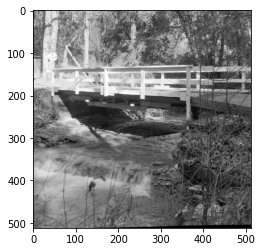

In [142]:
img = cv2.imread(val_data.images.values[8])
print(img.shape)
plt.imshow(img)
plt.show()

# Creating Train and Validation Image generators:

In [214]:
from tqdm import tqdm, trange

def get_images_in_mem(data, compressed_available = True):
    images_lst = []
    compressed_images_lst = []

    if compressed_available == True:
      images_path = data['images'].values
      compress_path = data['compressed_images'].values
      for i in trange(len(images_path)):
        img = cv2.imread(images_path[i])
        img = cv2.resize(img, (256, 256))
        compressed_img = cv2.imread(compress_path[i])
        compressed_img = cv2.resize(compressed_img, (256, 256))
        images_lst.append(img)
        compressed_images_lst.append(compressed_img) 

    elif compressed_available == False:
      images_path = data['images'].values
      for img_path in tqdm(images_path):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (256, 256))
        x = random.randint(30,60)
        cv2.imwrite('tmp.jpg', img , [int(cv2.IMWRITE_JPEG_QUALITY), x])
        compressed_img = cv2.imread('tmp.jpg')
        images_lst.append(img)
        compressed_images_lst.append(compressed_img)
    return np.array(compressed_images_lst) , np.array(images_lst)

In [215]:
train_compressed_images,train_images = get_images_in_mem(train_data, compressed_available= False )
val_compressed_images, val_images = get_images_in_mem(val_data, compressed_available= True )

100%|██████████| 19/19 [00:00<00:00, 96.24it/s]


In [216]:
def tf_data_generator(X, y, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((X, y)) # This is the main step for data generation
    dataset = dataset.shuffle(100, reshuffle_each_iteration=True)
    dataset = dataset.repeat()
    dataset = dataset.batch(batch_size=batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

BATCH_SIZE = 19
image_generator_train = tf_data_generator( X= train_compressed_images, y= train_images , batch_size=BATCH_SIZE)

In [217]:
image_generator_train

<PrefetchDataset shapes: ((19, 256, 256, 3), (19, 256, 256, 3)), types: (tf.uint8, tf.uint8)>

In [218]:
image_generator_val = tf_data_generator( X= val_compressed_images, y= val_images , batch_size= 19)

In [219]:
image_generator_val

<PrefetchDataset shapes: ((19, 256, 256, 3), (19, 256, 256, 3)), types: (tf.uint8, tf.uint8)>

# Model Creation:

In [236]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, Conv2DTranspose
from tensorflow.keras.models import Model
import os
import random

tf.keras.backend.clear_session()
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(0)
random.seed(0)


class ARCNN(tf.keras.layers.Layer):    
    def __init__(self):
        super().__init__()
        
        self.conv1 = Conv2D(64, kernel_size=(9,9), padding = 'same' ,activation= 'relu', name = 'Feature_Extract',
                              kernel_initializer= 'glorot_uniform' , use_bias = True)
        
        self.conv2 = Conv2D(32, kernel_size=(7,7), padding = 'same' ,activation= 'relu', name = 'Feature_Enhance',
                              kernel_initializer= 'glorot_uniform' , use_bias = True)
        
        self.conv3 = Conv2D(64, kernel_size=(1,1), padding = 'same' ,activation= 'relu', name = 'Feature_Mapping',
                              kernel_initializer= 'glorot_uniform' , use_bias = True)
        
        self.conv_trans = Conv2DTranspose(3, kernel_size=(7,7), padding='same', activation='relu', kernel_initializer='glorot_uniform',
                                          use_bias = True)
        
    def call(self, X):
        # implement the ARCNN based on image in the above cells
        X = self.conv1(X)
        X = self.conv2(X)
        X = self.conv3(X)
        output = self.conv_trans(X)

        return output

In [237]:
X_input = Input(shape=(256,256,3))

artifact_reduction = ARCNN()
X = artifact_reduction(X_input)

model = Model(inputs = X_input, outputs = X)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
arcnn (ARCNN)                (None, 256, 256, 3)       127523    
Total params: 127,523
Trainable params: 127,523
Non-trainable params: 0
_________________________________________________________________


# Model Traning:

In [238]:
# Defining Metric to be used

def ssim(y_true,y_pred):
    return tf.image.ssim(y_true,y_pred,max_val= 255)

def psnr(y_true,y_pred):
    return tf.image.psnr(y_true,y_pred,max_val= 255)


In [239]:
opt = tf.keras.optimizers.Adam(learning_rate= 0.0001)
model.compile( optimizer=opt , loss=tf.keras.losses.MeanSquaredError() , metrics=[psnr, ssim])

#Callback:
Earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_psnr', min_delta= 1, patience= 2, mode= 'max')

In [240]:
#Since we are creating infinite dataset hence we require these parameters 
steps_per_epoch_train = len(train_data.images.values)
steps_per_epoch_validation = len(val_data.images.values)

In [242]:
history = model.fit_generator(image_generator_train, steps_per_epoch = steps_per_epoch_train, epochs=50,
                              validation_data= image_generator_val, validation_steps = steps_per_epoch_validation,
                               callbacks = [Earlystop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
191/191 [==============================] - 50s 255ms/step - loss: 3712.7508 - psnr: 16.9359 - ssim: 0.5658 - val_loss: 227.9141 - val_psnr: 25.5252 - val_ssim: 0.7920
Epoch 2/50
191/191 [==============================] - 51s 266ms/step - loss: 141.9078 - psnr: 27.8471 - ssim: 0.8513 - val_loss: 142.5310 - val_psnr: 27.6473 - val_ssim: 0.8519
Epoch 3/50
191/191 [==============================] - 52s 272ms/step - loss: 100.4629 - psnr: 29.4692 - ssim: 0.8791 - val_loss: 120.0308 - val_psnr: 28.3628 - val_ssim: 0.8702
Epoch 4/50
191/191 [==============================] - 52s 272ms/step - loss: 86.2125 - psnr: 30.1658 - ssim: 0.8880 - val_loss: 103.0763 - val_psnr: 29.0475 - val_ssim: 0.8818
Epoch 5/50
191/191 [==============================] - 52s 273ms/step - loss: 81.4865 - psnr: 30.3690 - ssim: 0.8922 - val_loss: 93.6248 - val_psnr: 29.4503 - val_ssim: 0.8886
Epoch 6/50
191/191 [==============================] - 52s 273ms/step - loss: 73.3382 - psnr: 30.8889 - ssim: 0.8957 -

The Best model through traning our ARCNN architecture Model as following Metric Value:

PSNR: 29.3887

SSIM: 0.8934

# Evaluation Output:

In [305]:
def plot_evaluation(model, test_df, n):

  comp_path = test_df['compressed_images'].values
  image_path = test_df['images'].values

  comp_image = cv2.imread(comp_path[n])
  comp_image = cv2.resize(comp_image, (256,256))

  ground_truth = cv2.imread(image_path[n])
  ground_truth = cv2.resize(ground_truth, (256,256))
  ground = ground_truth.reshape((1,256,256,3))


  im = comp_image.reshape((1,256,256,3))
  predicted_img = model.predict(im) 
  predicted_im = predicted_img.reshape((256,256,3))
  predicted_im/=255

  psnr_value = psnr(ground, predicted_img)
  plt.figure(figsize=(15,15))
  plt.subplot(1,3,1)
  plt.imshow(comp_image)
  plt.title('Compressed Image')
  plt.subplot(1,3,2)
  plt.imshow(ground_truth)
  plt.title('Ground Truth Image')
  plt.subplot(1,3,3)
  plt.imshow(predicted_im)
  plt.title('Predicted Image')
  plt.show()
  print()
  tf.print('PSNR Value: ',psnr_value[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


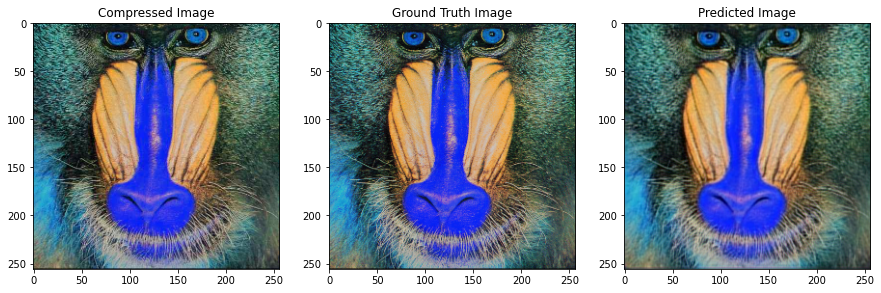


PSNR Value:  24.0929642


In [365]:
plot_evaluation(model, test_df= val_data, n = 1)

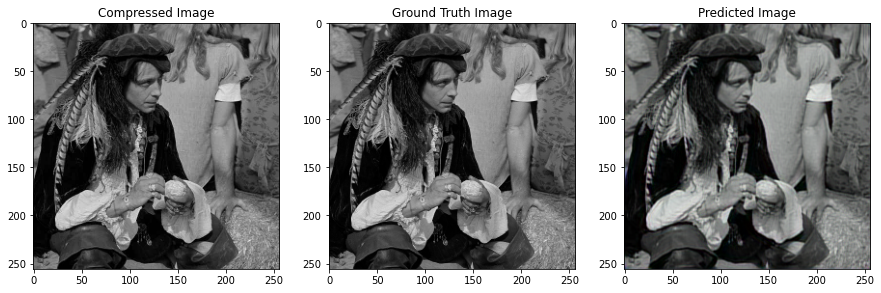


PSNR Value:  30.7301064


In [301]:
plot_evaluation(model, test_df= val_data, n = 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


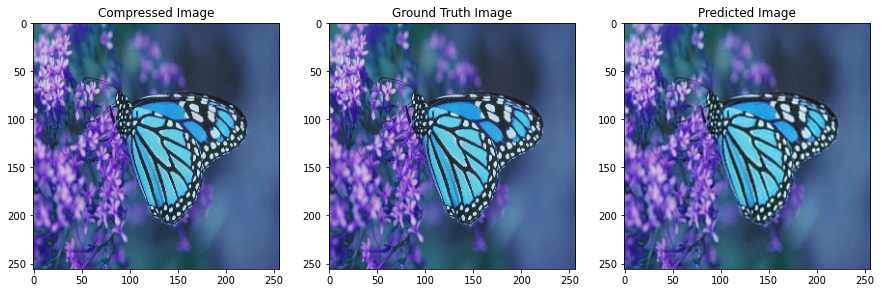


PSNR Value:  28.0178509


In [302]:
plot_evaluation(model, test_df= val_data, n = 5)

**This is in regards of Implementation point of view . Further to achieve better metric score we could use other advance architectures as well instead of ARCNN**

# Creating Folder and Saving Required Results as per Email:

In [369]:
import os

main_dir = '/content/'
dir = 'Evaluation/'
path = os.path.join(main_dir, dir) 
os.mkdir(path)

main_evaluation_dir = '/content/Evaluation'
set_14_dir = 'Set_14_Evaluation/'
set_14_path = os.path.join(main_evaluation_dir, set_14_dir)
os.mkdir(set_14_path)

set_5_dir = 'Set_5_Evaluation/'
set_5_path = os.path.join(main_evaluation_dir, set_5_dir)
os.mkdir(set_5_path)

psnr_set14_df = pd.DataFrame()
psnr_set5_df = pd.DataFrame()
psnr_set14 = []
psnr_set14_path = []
psnr_set5 = []
psnr_set5_path = []
for i in range(len(val_data)):
  comp_path = val_data['compressed_images'].values
  image_path = val_data['images'].values

  comp_image = cv2.imread(comp_path[i])
  img_height = comp_image.shape[0]
  img_width = comp_image.shape[1]
  comp_image = cv2.resize(comp_image, (256,256))
  comp = comp_image.reshape((1,256,256,3))

  ground_truth = cv2.imread(image_path[i])
  ground_truth = cv2.resize(ground_truth, (256,256))
  ground = ground_truth.reshape((1,256,256,3))

  predicted_img = model.predict(comp) 
  predicted_im = predicted_img.reshape((256,256,3))
  image = cv2.resize(predicted_im,(img_width, img_height))

  if 'set14' in comp_path[i]:
    cv2.imwrite(os.path.join(set_14_path , str(comp_path[i]).split('/')[-1]), image)
    #psnr_set14.append(np.array(psnr_value)[0])
    #psnr_set14_path.append(comp_path[i])
  elif 'set5' in comp_path[i]:
    cv2.imwrite(os.path.join(set_5_path , str(comp_path[i]).split('/')[-1]), image)
    #psnr_set5.append(np.array(psnr_value)[0])
    #psnr_set5_path.append(comp_path[i])
  predicted_im/=225
  psnr_value = psnr(ground, predicted_im)

  if 'set14' in comp_path[i]:
    psnr_set14.append(np.array(psnr_value)[0])
    psnr_set14_path.append(comp_path[i])
  elif 'set5' in comp_path[i]:
    psnr_set5.append(np.array(psnr_value)[0])
    psnr_set5_path.append(comp_path[i])

psnr_set14_df['Image_id'] = psnr_set14_path
psnr_set14_df['PSNR_Value'] = psnr_set14
  
psnr_set5_df['Image_id'] = psnr_set5_path
psnr_set5_df['PSNR_Value'] = psnr_set5

psnr_set14_df.to_csv(str(set_14_path)+'psnr.csv', index=False)
psnr_set5_df.to_csv(str(set_5_path)+'psnr.csv', index=False)

In [370]:
!zip -r '/content/Evaluation.zip' '/content/Evaluation'

updating: content/Evaluation/ (stored 0%)
updating: content/Evaluation/Set_5_Evaluation/ (stored 0%)
updating: content/Evaluation/Set_5_Evaluation/head.png (deflated 2%)
updating: content/Evaluation/Set_5_Evaluation/baby.png (deflated 2%)
updating: content/Evaluation/Set_5_Evaluation/butterfly.png (deflated 0%)
updating: content/Evaluation/Set_5_Evaluation/bird.png (deflated 0%)
updating: content/Evaluation/Set_5_Evaluation/psnr.csv (deflated 54%)
updating: content/Evaluation/Set_5_Evaluation/woman.png (deflated 1%)
updating: content/Evaluation/Set_14_Evaluation/ (stored 0%)
updating: content/Evaluation/Set_14_Evaluation/lenna.png (deflated 2%)
updating: content/Evaluation/Set_14_Evaluation/baboon.png (deflated 0%)
updating: content/Evaluation/Set_14_Evaluation/man.png (deflated 2%)
updating: content/Evaluation/Set_14_Evaluation/coastguard.png (deflated 1%)
updating: content/Evaluation/Set_14_Evaluation/face.png (deflated 1%)
updating: content/Evaluation/Set_14_Evaluation/monarch.png (

In [371]:
from google.colab import files

files.download('/content/Evaluation.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>